In [153]:
import pandas as pd
import csv
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [154]:
data = pd.read_csv("Downloaded-Data-Ready-For-Analysis.csv")

In [155]:
data.head(5)

,Make,Model,Year,Days_Booked_Per_Month,Earnings_Per_Booked_Day,Estimated_Earnings_Per_Month,Ratio_Earnings_Per_Month_To_Car_Price,Recommended_Daily_Price,Estimated_Vehicle_Value,Style_Label,Transmission,Trim,Trim_Label,Vehicle_Definition_ID
0,Ferrari,FF,2012,0.84,551.93,463.62,0.0015,788.47,295000,2dr Coupe AWD (6.3L 12cyl 7AM),AUTOMATED_MANUAL,Base,Base,21456
1,Ferrari,F430,2009,1.47,477.20,701.48,0.0035,681.71,200054,2dr Coupe (4.3L 8cyl 6AM),AUTOMATED_MANUAL,F1,F1,21453
2,Ferrari,F430,2008,1.87,443.25,828.87,0.0041,633.22,199054,2dr Coupe (4.3L 8cyl 6AM),AUTOMATED_MANUAL,F1,F1,21449
3,Ferrari,F430,2007,4.50,312.56,1406.52,0.0069,446.51,201213,2dr Convertible (4.3L 8cyl 6M),MANUAL,Spider,Spider,21445
4,Ferrari,F430,2006,5.42,281.88,1527.78,0.0079,402.68,192484,2dr Convertible (4.3L 8cyl 6M),MANUAL,Spider,Spider,21440


In [156]:
data.columns

Index(['Make', 'Model', 'Year', 'Days_Booked_Per_Month',
       'Earnings_Per_Booked_Day', 'Estimated_Earnings_Per_Month',
       'Ratio_Earnings_Per_Month_To_Car_Price', 'Recommended_Daily_Price',
       'Estimated_Vehicle_Value', 'Style_Label', 'Transmission', 'Trim',
       'Trim_Label', 'Vehicle_Definition_ID'],
      dtype='object')

In [157]:
for i in data.columns:
    try:
        print(i)
        print(data[i].describe())
        print()
        print("*****************")
        print()
        print()
    except:
        print()
        print("FAIL")
        pass;

Make
count           738
unique           21
top       Chevrolet
freq            103
Name: Make, dtype: object

*****************


Model
count        738
unique       158
top       Sonata
freq           8
Name: Model, dtype: object

*****************


Year
count     738.000000
mean     2009.124661
std         2.055053
min      2006.000000
25%      2007.000000
50%      2009.000000
75%      2011.000000
max      2013.000000
Name: Year, dtype: float64

*****************


Days_Booked_Per_Month
count    738.000000
mean      17.073415
std        3.372314
min        0.840000
25%       15.600000
50%       17.315000
75%       19.312500
max       22.230000
Name: Days_Booked_Per_Month, dtype: float64

*****************


Earnings_Per_Booked_Day
count    738.000000
mean      48.757222
std       48.886287
min       17.000000
25%       27.075000
50%       34.810000
75%       48.175000
max      551.930000
Name: Earnings_Per_Booked_Day, dtype: float64

*****************


Estimated_Earnings_Per_Mont

In [158]:
data.describe()

,Year,Days_Booked_Per_Month,Earnings_Per_Booked_Day,Estimated_Earnings_Per_Month,Ratio_Earnings_Per_Month_To_Car_Price,Recommended_Daily_Price,Estimated_Vehicle_Value,Vehicle_Definition_ID
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,2009.124661,17.073415,48.757222,693.056057,0.066888,69.652873,22225.203252,23231.246612
std,2.055053,3.372314,48.886287,278.437679,0.029905,69.837533,50197.832307,9191.432449
min,2006.000000,0.840000,17.000000,371.620000,0.001500,24.290000,2371.000000,61.000000
25%,2007.000000,15.600000,27.075000,519.140000,0.047425,38.672500,6527.500000,16630.000000
50%,2009.000000,17.315000,34.810000,610.880000,0.061850,49.735000,9793.500000,21163.000000
75%,2011.000000,19.312500,48.175000,746.222500,0.083600,68.820000,15187.250000,28941.500000
max,2013.000000,22.230000,551.930000,1699.610000,0.178500,788.470000,340990.000000,58071.000000


In [159]:
data.isnull().sum()

Make                                     0
Model                                    0
Year                                     0
Days_Booked_Per_Month                    0
Earnings_Per_Booked_Day                  0
Estimated_Earnings_Per_Month             0
Ratio_Earnings_Per_Month_To_Car_Price    0
Recommended_Daily_Price                  0
Estimated_Vehicle_Value                  0
Style_Label                              8
Transmission                             0
Trim                                     8
Trim_Label                               8
Vehicle_Definition_ID                    0
dtype: int64

In [160]:
data = data.drop(data.loc[data['Style_Label'].isnull()].index)

In [161]:
data.isnull().sum()

Make                                     0
Model                                    0
Year                                     0
Days_Booked_Per_Month                    0
Earnings_Per_Booked_Day                  0
Estimated_Earnings_Per_Month             0
Ratio_Earnings_Per_Month_To_Car_Price    0
Recommended_Daily_Price                  0
Estimated_Vehicle_Value                  0
Style_Label                              0
Transmission                             0
Trim                                     0
Trim_Label                               0
Vehicle_Definition_ID                    0
dtype: int64

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 737
Data columns (total 14 columns):
Make                                     730 non-null object
Model                                    730 non-null object
Year                                     730 non-null int64
Days_Booked_Per_Month                    730 non-null float64
Earnings_Per_Booked_Day                  730 non-null float64
Estimated_Earnings_Per_Month             730 non-null float64
Ratio_Earnings_Per_Month_To_Car_Price    730 non-null float64
Recommended_Daily_Price                  730 non-null float64
Estimated_Vehicle_Value                  730 non-null int64
Style_Label                              730 non-null object
Transmission                             730 non-null object
Trim                                     730 non-null object
Trim_Label                               730 non-null object
Vehicle_Definition_ID                    730 non-null int64
dtypes: float64(5), int64(3), object(6)

In [163]:
data['monthly-cost-of-ownership'] = (data['Estimated_Vehicle_Value']/60).round(2)

In [165]:
data['profitable'] = np.where(data['Estimated_Earnings_Per_Month']>data['monthly-cost-of-ownership'], 'TRUE', 'FALSE')

In [166]:
data['amount_profit'] = np.where(data['Estimated_Earnings_Per_Month']>data['monthly-cost-of-ownership'], data['Estimated_Earnings_Per_Month']-data['monthly-cost-of-ownership'], '0')
data['amount_profit'] = pd.to_numeric(data['amount_profit'])

In [215]:
data['percent_roi_annual'] = np.where(data['Estimated_Earnings_Per_Month']>data['monthly-cost-of-ownership'], ((data['Estimated_Earnings_Per_Month']-data['monthly-cost-of-ownership'])/data['Estimated_Vehicle_Value'])*1200, '0')
data['percent_roi_annual'] = pd.to_numeric(data['percent_roi_annual'])

In [205]:
data['trips_until_breakeven'] = data['monthly-cost-of-ownership']/data['Earnings_Per_Booked_Day']

In [220]:
data.head(100)

,Make,Model,Year,Days_Booked_Per_Month,Earnings_Per_Booked_Day,Estimated_Earnings_Per_Month,Ratio_Earnings_Per_Month_To_Car_Price,Recommended_Daily_Price,Estimated_Vehicle_Value,Style_Label,Transmission,Trim,Trim_Label,Vehicle_Definition_ID,monthly-cost-of-ownership,profitable,amount_profit,percent_roi_annual,trips_until_breakeven
41,Cadillac,XLR,2009,10.68,116.81,1247.53,0.0403,166.87,30918,2dr Convertible (4.6L 8cyl 6A),AUTOMATIC,Platinum,Platinum,17497,515.30,TRUE,732.23,28.419561,4.411437
42,Cadillac,XLR-V,2009,10.75,119.50,1284.62,0.0322,170.72,39786,2dr Convertible (4.4L 8cyl S/C 6A),AUTOMATIC,Base,Base,17502,663.10,TRUE,621.52,18.745891,5.548954
43,Chevrolet,Corvette,2009,10.82,113.82,1231.53,0.0409,162.60,30064,2dr Convertible (6.2L 8cyl 6M),MANUAL,GT1 Championship Spec Ed,GT1 Championship Spec Ed,18049,501.07,TRUE,730.46,29.156200,4.402302
44,Cadillac,XLR,2008,11.29,104.42,1178.90,0.0438,149.17,26901,2dr Convertible (4.6L 8cyl 6A),AUTOMATIC,Alpine White Edition,Alpine White Edition,17495,448.35,TRUE,730.55,32.588380,4.293718
45,Chevrolet,Corvette,2012,11.32,103.31,1169.46,0.0379,147.58,30797,2dr Coupe (6.2L 8cyl 6M),MANUAL,GS,GS,18068,513.28,TRUE,656.18,25.567945,4.968348
47,Chevrolet,Corvette,2011,11.78,94.82,1116.97,0.0437,135.46,25532,2dr Coupe (6.2L 8cyl 6M),MANUAL,GS,GS,18062,425.53,TRUE,691.44,32.497572,4.487766
48,Cadillac,XLR,2007,11.83,96.59,1142.65,0.0515,137.99,22173,2dr Convertible (4.6L 8cyl 6A),AUTOMATIC,Platinum Edition,Platinum Edition,17493,369.55,TRUE,773.10,41.840076,3.825965
49,Cadillac,XLR-V,2008,11.87,91.75,1089.07,0.0356,131.07,30575,2dr Convertible (4.4L 8cyl S/C 6A),AUTOMATIC,Base,Base,17500,509.58,TRUE,579.49,22.743679,5.554005
50,BMW,M3,2011,11.97,91.32,1093.10,0.0439,130.46,24859,2dr Coupe (4.0L 8cyl 6M),MANUAL,Base,Base,16156,414.32,TRUE,678.78,32.766242,4.537013
51,BMW,M5,2010,12.03,90.08,1083.66,0.0439,128.68,24667,4dr Sedan (5.0L 10cyl 7AM),AUTOMATED_MANUAL,Base,Base,16176,411.12,TRUE,672.54,32.717720,4.563943


In [221]:
def distribution_plot(data):
    sns.distplot(data, fit=norm)
    plt.ylabel('Frequency')
    plt.title(f'{data.name} distribution')
    plt.show()

    print()
    print()
    
#distribution_plot(data['Year'])

#distribution_plot(data2['Year'])


fail
fail


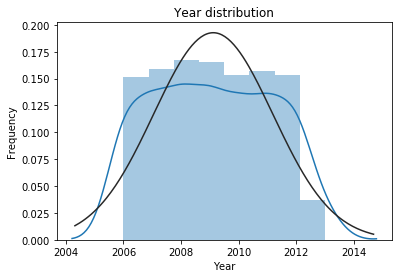

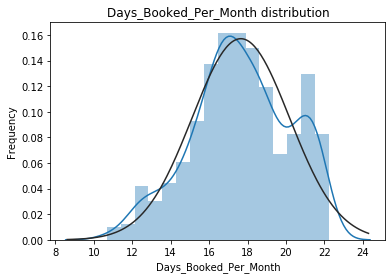

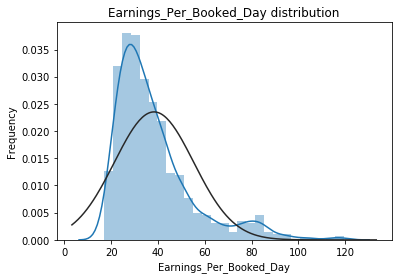

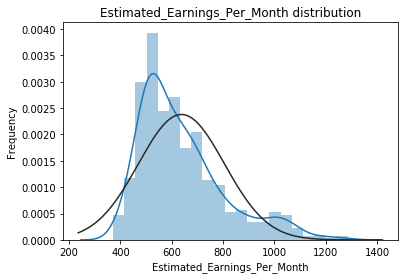

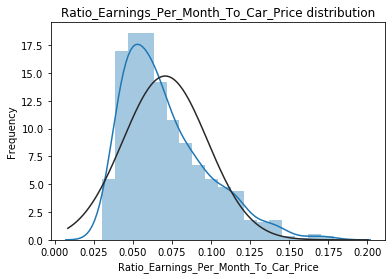

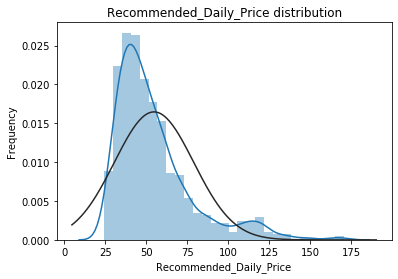

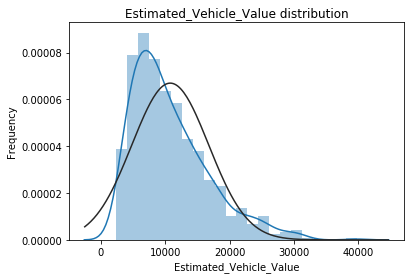



fail
fail
fail
fail


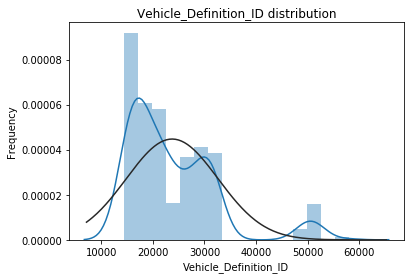

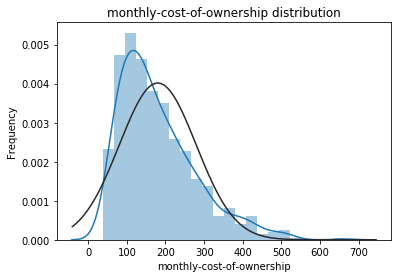



fail


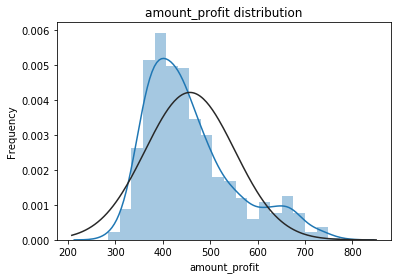

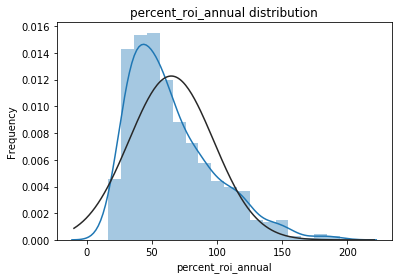

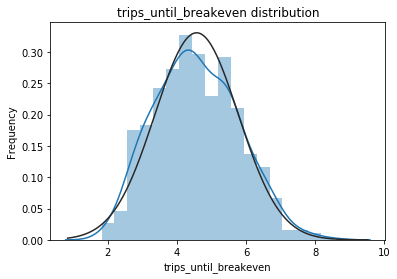

In [222]:
for i in data.columns:
    try:
        distribution_plot(data[i])
    except:
        print("fail")

In [223]:
data2 = data
# Get names of indexes for which column Age has value 30
earnings_outliers = data2[ data2['Earnings_Per_Booked_Day'] > 150 ].index
vehicle_value_outliers = data2[ data2['Estimated_Vehicle_Value'] > 50000 ].index
# Delete these row indexes from dataFrame
data2.drop(earnings_outliers , inplace=True)
data2.drop(vehicle_value_outliers , inplace=True)

fail
fail


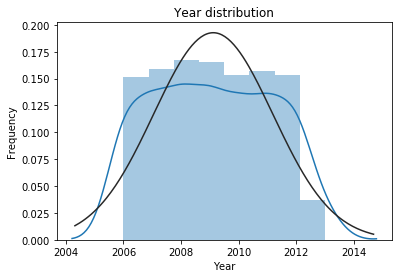

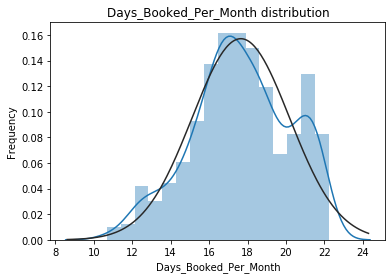

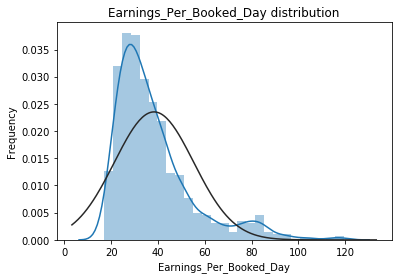

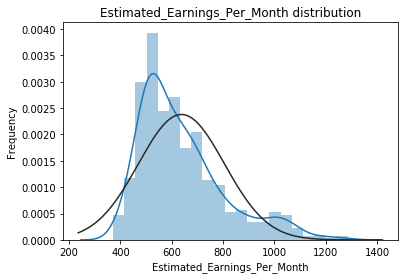

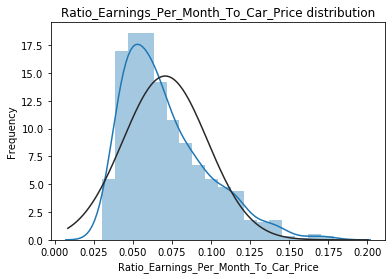

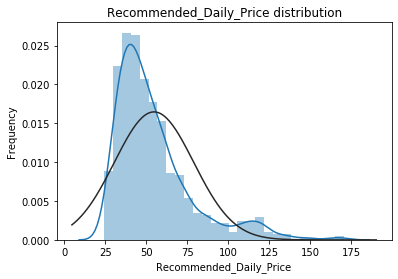

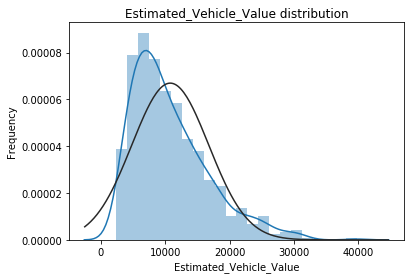



fail
fail
fail
fail


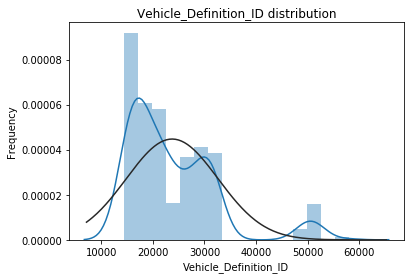

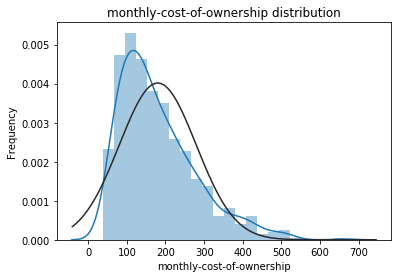



fail


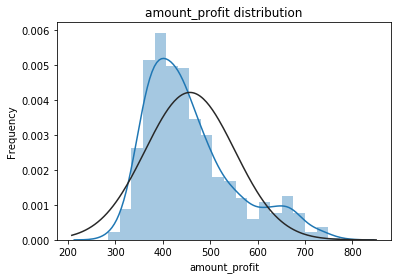

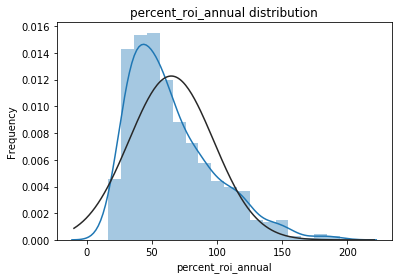

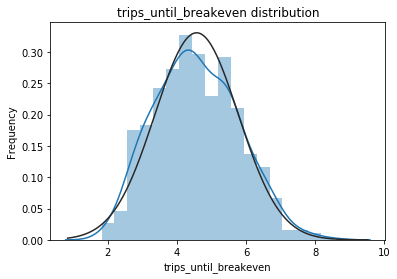

In [224]:
for i in data2.columns:
    try:
        distribution_plot(data2[i])
    except:
        print("fail")

In [225]:
data2.nlargest(10,'percent_roi_annual')

,Make,Model,Year,Days_Booked_Per_Month,Earnings_Per_Booked_Day,Estimated_Earnings_Per_Month,Ratio_Earnings_Per_Month_To_Car_Price,Recommended_Daily_Price,Estimated_Vehicle_Value,Style_Label,Transmission,Trim,Trim_Label,Vehicle_Definition_ID,monthly-cost-of-ownership,profitable,amount_profit,percent_roi_annual,trips_until_breakeven
567,Dodge,Caravan,2006,19.46,25.66,499.34,0.1785,36.65,2796,4dr Minivan (3.3L 6cyl 4A),AUTOMATIC,C/V,C/V,21661,46.60,TRUE,452.74,194.309013,1.816056
523,Isuzu,Ascender,2006,18.91,37.30,705.34,0.1725,53.29,4088,S 5-Passenger 4dr SUV 4WD (4.2L 6cyl 4A),AUTOMATIC,S 5 Passenger,S 5 Passenger,31877,68.13,TRUE,637.21,187.047945,1.826542
737,Chevrolet,Aveo,2006,22.23,17.97,399.47,0.1684,25.67,2371,4dr Sedan (1.6L 4cyl 5M),MANUAL,LS,LS,17618,39.52,TRUE,359.95,182.176297,2.199221
564,Dodge,Caravan,2007,19.43,25.66,498.57,0.1683,36.65,2962,4dr Minivan (3.3L 6cyl 4A),AUTOMATIC,C/V,C/V,21664,49.37,TRUE,449.20,181.985145,1.924006
719,Chrysler,Sebring,2006,21.82,21.92,478.29,0.1641,31.32,2914,4dr Sedan (2.7L 6cyl 4A),AUTOMATIC,TSI,TSI,21206,48.57,TRUE,429.72,176.960879,2.215785
559,Ford,Freestar,2007,19.37,25.75,498.77,0.1561,36.78,3194,4dr Minivan (4.2L 6cyl 4A),AUTOMATIC,SE,SE,25943,53.23,TRUE,445.54,167.391359,2.067184
566,Ford,Freestyle,2006,19.45,26.38,513.09,0.1481,37.69,3463,4dr Wagon AWD (3.0L 6cyl CVT),AUTOMATIC,SEL,SEL,25955,57.72,TRUE,455.37,157.794975,2.188021
556,Chevrolet,Uplander,2006,19.33,25.83,499.29,0.1479,36.90,3374,4dr Ext Minivan (3.5L 6cyl 4A),AUTOMATIC,LS,LS,20868,56.23,TRUE,443.06,157.579135,2.176926
553,Ford,Freestar,2006,19.32,25.75,497.49,0.1452,36.78,3424,4dr Minivan (4.2L 6cyl 4A),AUTOMATIC,SEL,SEL,51696,57.07,TRUE,440.42,154.352804,2.216311
735,Hyundai,Accent,2006,22.12,18.30,404.79,0.1444,26.15,2802,4dr Sedan (1.6L 4cyl 4A),AUTOMATIC,GLS,GLS,50437,46.70,TRUE,358.09,153.357602,2.551913


In [226]:
data2.nsmallest(10,'trips_until_breakeven')

,Make,Model,Year,Days_Booked_Per_Month,Earnings_Per_Booked_Day,Estimated_Earnings_Per_Month,Ratio_Earnings_Per_Month_To_Car_Price,Recommended_Daily_Price,Estimated_Vehicle_Value,Style_Label,Transmission,Trim,Trim_Label,Vehicle_Definition_ID,monthly-cost-of-ownership,profitable,amount_profit,percent_roi_annual,trips_until_breakeven
567,Dodge,Caravan,2006,19.46,25.66,499.34,0.1785,36.65,2796,4dr Minivan (3.3L 6cyl 4A),AUTOMATIC,C/V,C/V,21661,46.60,TRUE,452.74,194.309013,1.816056
523,Isuzu,Ascender,2006,18.91,37.30,705.34,0.1725,53.29,4088,S 5-Passenger 4dr SUV 4WD (4.2L 6cyl 4A),AUTOMATIC,S 5 Passenger,S 5 Passenger,31877,68.13,TRUE,637.21,187.047945,1.826542
564,Dodge,Caravan,2007,19.43,25.66,498.57,0.1683,36.65,2962,4dr Minivan (3.3L 6cyl 4A),AUTOMATIC,C/V,C/V,21664,49.37,TRUE,449.20,181.985145,1.924006
559,Ford,Freestar,2007,19.37,25.75,498.77,0.1561,36.78,3194,4dr Minivan (4.2L 6cyl 4A),AUTOMATIC,SE,SE,25943,53.23,TRUE,445.54,167.391359,2.067184
519,Hyundai,Entourage,2007,18.83,33.55,631.74,0.1442,47.93,4379,4dr Minivan (3.8L 6cyl 5A),AUTOMATIC,SE,SE,30882,72.98,TRUE,558.76,153.119890,2.175261
556,Chevrolet,Uplander,2006,19.33,25.83,499.29,0.1479,36.90,3374,4dr Ext Minivan (3.5L 6cyl 4A),AUTOMATIC,LS,LS,20868,56.23,TRUE,443.06,157.579135,2.176926
566,Ford,Freestyle,2006,19.45,26.38,513.09,0.1481,37.69,3463,4dr Wagon AWD (3.0L 6cyl CVT),AUTOMATIC,SEL,SEL,25955,57.72,TRUE,455.37,157.794975,2.188021
737,Chevrolet,Aveo,2006,22.23,17.97,399.47,0.1684,25.67,2371,4dr Sedan (1.6L 4cyl 5M),MANUAL,LS,LS,17618,39.52,TRUE,359.95,182.176297,2.199221
515,Isuzu,Ascender,2007,18.79,36.59,687.52,0.1423,52.27,4830,4dr SUV (4.2L 6cyl 4A),AUTOMATIC,S,S,31880,80.50,TRUE,607.02,150.812422,2.200055
719,Chrysler,Sebring,2006,21.82,21.92,478.29,0.1641,31.32,2914,4dr Sedan (2.7L 6cyl 4A),AUTOMATIC,TSI,TSI,21206,48.57,TRUE,429.72,176.960879,2.215785


In [227]:
data2.nlargest(10, 'amount_profit')

,Make,Model,Year,Days_Booked_Per_Month,Earnings_Per_Booked_Day,Estimated_Earnings_Per_Month,Ratio_Earnings_Per_Month_To_Car_Price,Recommended_Daily_Price,Estimated_Vehicle_Value,Style_Label,Transmission,Trim,Trim_Label,Vehicle_Definition_ID,monthly-cost-of-ownership,profitable,amount_profit,percent_roi_annual,trips_until_breakeven
48,Cadillac,XLR,2007,11.83,96.59,1142.65,0.0515,137.99,22173,2dr Convertible (4.6L 8cyl 6A),AUTOMATIC,Platinum Edition,Platinum Edition,17493,369.55,TRUE,773.10,41.840076,3.825965
79,Chevrolet,Corvette,2006,12.99,80.09,1040.36,0.0588,114.41,17683,2dr Convertible (6.0L 8cyl 6M),MANUAL,Base,Base,18032,294.72,TRUE,745.64,50.600464,3.679860
69,Cadillac,XLR,2006,12.62,84.23,1062.98,0.0544,120.33,19515,2dr Convertible (4.6L 8cyl 5A),AUTOMATIC,Base,Base,17489,325.25,TRUE,737.73,45.363874,3.861451
370,Cadillac,Escalade,2006,17.34,50.81,881.04,0.1001,72.59,8797,4dr SUV (6.0L 8cyl 4A),AUTOMATIC,Base,Base,17194,146.62,TRUE,734.42,100.182335,2.885652
41,Cadillac,XLR,2009,10.68,116.81,1247.53,0.0403,166.87,30918,2dr Convertible (4.6L 8cyl 6A),AUTOMATIC,Platinum,Platinum,17497,515.30,TRUE,732.23,28.419561,4.411437
44,Cadillac,XLR,2008,11.29,104.42,1178.90,0.0438,149.17,26901,2dr Convertible (4.6L 8cyl 6A),AUTOMATIC,Alpine White Edition,Alpine White Edition,17495,448.35,TRUE,730.55,32.588380,4.293718
43,Chevrolet,Corvette,2009,10.82,113.82,1231.53,0.0409,162.60,30064,2dr Convertible (6.2L 8cyl 6M),MANUAL,GT1 Championship Spec Ed,GT1 Championship Spec Ed,18049,501.07,TRUE,730.46,29.156200,4.402302
95,Audi,A7,2012,13.61,80.73,1098.73,0.0486,115.33,22583,4dr Sedan AWD (3.0L 6cyl S/C 8A),AUTOMATIC,Premium quattro,Premium quattro,15096,376.38,TRUE,722.35,38.383740,4.662207
61,Hummer,H2,2009,12.37,96.01,1187.64,0.0423,137.16,28047,4dr SUV 4WD (6.2L 8cyl 6A),AUTOMATIC,Base,Base,21470,467.45,TRUE,720.19,30.813563,4.868764
67,BMW,M5,2009,12.59,83.43,1050.38,0.0516,119.18,20344,4dr Sedan (5.0L 10cyl 7AM),AUTOMATED_MANUAL,Base,Base,16175,339.07,TRUE,711.31,41.956941,4.064126
